# **CodSoft Data Science Internship**
Name: Prachiti Raut

# IRIS FLOWER CLASSIFICATION
Problem Statement:
 Predict the species of Iris flowers (Setosa, Versicolor, Virginica)
 based on sepal and petal measurements using machine learning.

# Step 1: Import Libraries

Libraries for data handling, visualization, preprocessing, and ML models

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Step 2: Load Dataset
Load Iris dataset and separate features & target

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/sample_data/IRIS.csv'
data = pd.read_csv(file_path)
print(data.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [ ]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)  # feature data
y = pd.Series(iris.target)                                # target species


# Dataset description

Features:

sepal length,
sepal width,
petal length,
petal width

Target:

0 → setosa,

1 → versicolor,

2 → virginica


# Step 3: Exploratory Data Analysis (EDA)

Visualize data distribution, feature correlation, and separability

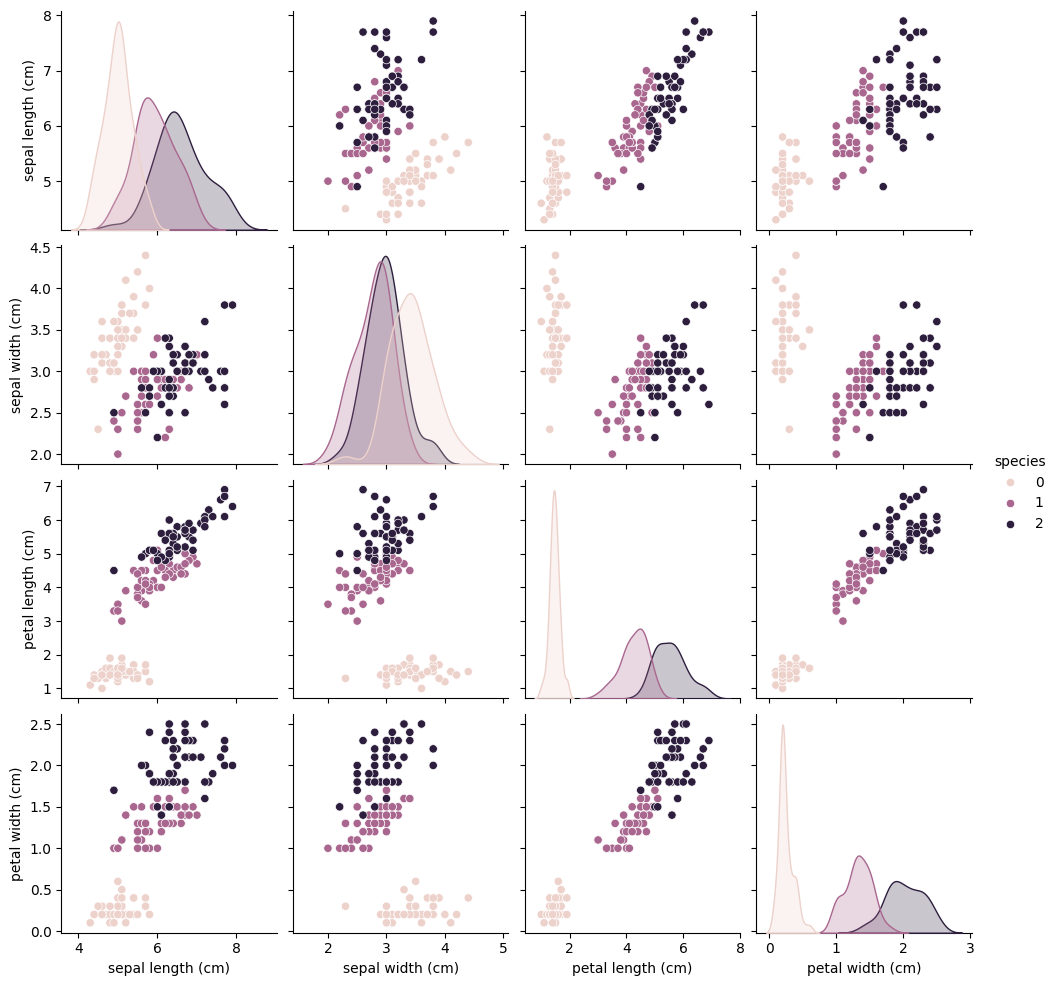

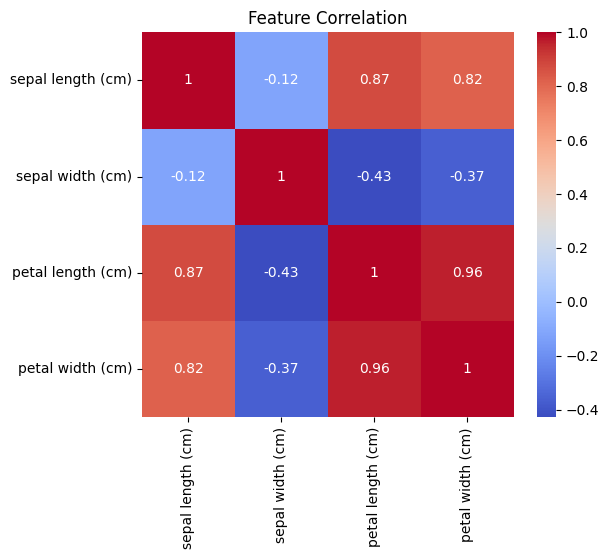

In [ ]:
sns.pairplot(pd.concat([X, y.rename('species')], axis=1), hue='species')
plt.show()

plt.figure(figsize=(6,5))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

# Insight:
 Petal length & width are highly discriminative, setosa is clearly separable


# Step 4: Train-Test Split
 Split dataset into training (80%) and testing (20%), stratified by class

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (120, 4)
Testing set shape: (30, 4)


# Step 5: Feature Scaling
Scale features to ensure all variables contribute equally to models

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Train Machine Learning Models
Train multiple classifiers to predict Iris species

In [ ]:
# Logistic Regression - interpretable, good baseline
log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=200)

In [ ]:
# Random Forest - handles non-linear patterns
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [ ]:
# Support Vector Classifier - works well with linear separable data
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear', probability=True)

# Step 7: Evaluate Models
 Function to print classification report and plot confusion matrix

In [ ]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    print(f"\n🔎 Model: {model_name}")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


🔎 Model: Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



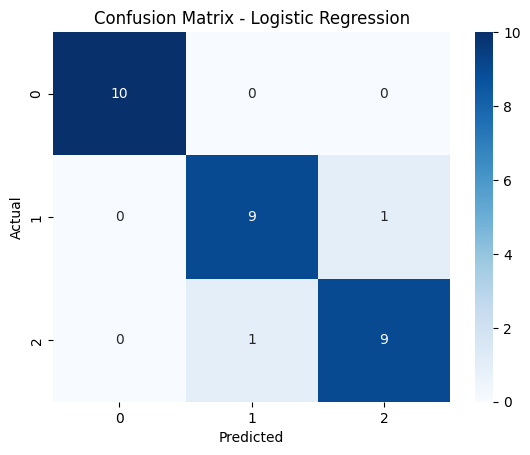


🔎 Model: Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      0.90      0.86        10
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



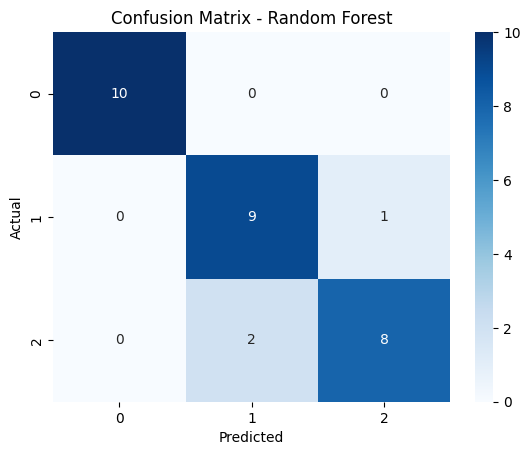


🔎 Model: SVM (Linear Kernel)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



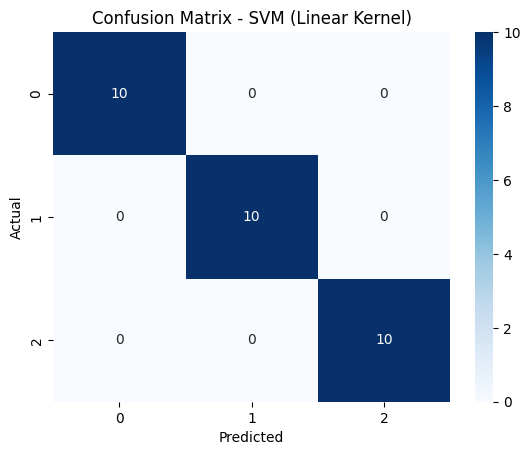

In [ ]:
# Evaluate all models
evaluate_model(log_model, X_test_scaled, y_test, "Logistic Regression")
evaluate_model(rf_model, X_test_scaled, y_test, "Random Forest")
evaluate_model(svm_model, X_test_scaled, y_test, "SVM (Linear Kernel)")

# Step 8: Business Insights / Conclusion
Insights:
- Iris dataset is small & clean → easy to classify.
- Logistic Regression & SVM perform well due to linear separability.
- Random Forest handles complex patterns but may be unnecessary here.
- Petal length & width are key features for distinguishing species.
- Approach can be used for automated flower recognition systems.